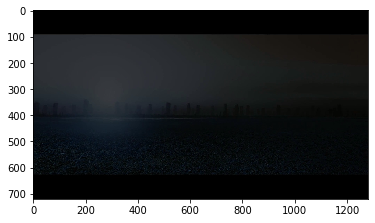

In [14]:
import os
images = os.listdir('left/Dredd')
#images2 = os.listdir('left/skyscraper')
import numpy as np
import matplotlib.pyplot as plt
import cv2

imageL = cv2.imread('left/Dredd/'+images[1300])
#imageR = cv2.imread('left/skyscraper/'+images2[50000])

plt.imshow(imageL)
plt.show()
#plt.imshow(imageR)
#plt.show()

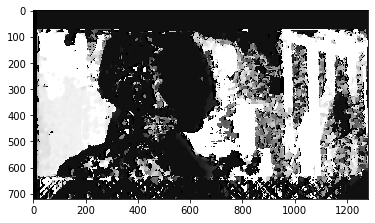

In [2]:
imgRBW = cv2.cvtColor(imageR, cv2.COLOR_BGR2GRAY)
imgLBW = cv2.cvtColor(imageL, cv2.COLOR_BGR2GRAY)

stereo = cv2.StereoSGBM_create(numDisparities=16, blockSize=15)
disparity = stereo.compute(imgRBW,imgLBW)

plt.imshow(disparity,'gray')
plt.show()

In [4]:
import torch
x_base = torch.linspace(0, 1, 8).repeat(1, 5, 1)
y_base = torch.linspace(0, 1, 5).repeat(1, 8, 1).transpose(1, 2)

print(x_base)
print(y_base)


tensor([[[0.0000, 0.1429, 0.2857, 0.4286, 0.5714, 0.7143, 0.8571, 1.0000],
         [0.0000, 0.1429, 0.2857, 0.4286, 0.5714, 0.7143, 0.8571, 1.0000],
         [0.0000, 0.1429, 0.2857, 0.4286, 0.5714, 0.7143, 0.8571, 1.0000],
         [0.0000, 0.1429, 0.2857, 0.4286, 0.5714, 0.7143, 0.8571, 1.0000],
         [0.0000, 0.1429, 0.2857, 0.4286, 0.5714, 0.7143, 0.8571, 1.0000]]])
tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.2500, 0.2500, 0.2500, 0.2500, 0.2500, 0.2500, 0.2500, 0.2500],
         [0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000],
         [0.7500, 0.7500, 0.7500, 0.7500, 0.7500, 0.7500, 0.7500, 0.7500],
         [1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000]]])


In [3]:
import os
movies = os.listdir('left/Dredd')